# Hipoteza I
Wzrost liczby użytkowników portalu Facebook w czasie jest wykładniczy lub potęgowy. \
\
Dane treningowe: kwartalne dane liczby użytkowników z lat 2009-2017 \
Dane testowe: kwartalne dane liczby użytkowników z lat 2018-2023 \
\
Wykorzystane modele:
- wykładniczy
- potęgowy

Zmienna objaśniana: liczba użytkowniów (Users) \
Zmienna objaśniająca: kwartał (NoQ)

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

import importlib

from sklearn.metrics import mean_absolute_error

dane = importlib.import_module('Lab-1-Zadanie-1-Przygotowanie-danych')

## Model liniowy
Model liniowy służący jako punkt odwołania dla pozostałych modeli

$Y = X * a + b$

$Y$ -> 'Users' \
$X$ -> 'NoQ'

PODSUMOWANIE MODELU LINIOWEGO (dla danych 2009-2017)

                            OLS Regression Results                            
Dep. Variable:                  Users   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     7613.
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           1.41e-41
Time:                        14:03:25   Log-Likelihood:                -180.55
No. Observations:                  36   AIC:                             365.1
Df Residuals:                      34   BIC:                             368.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

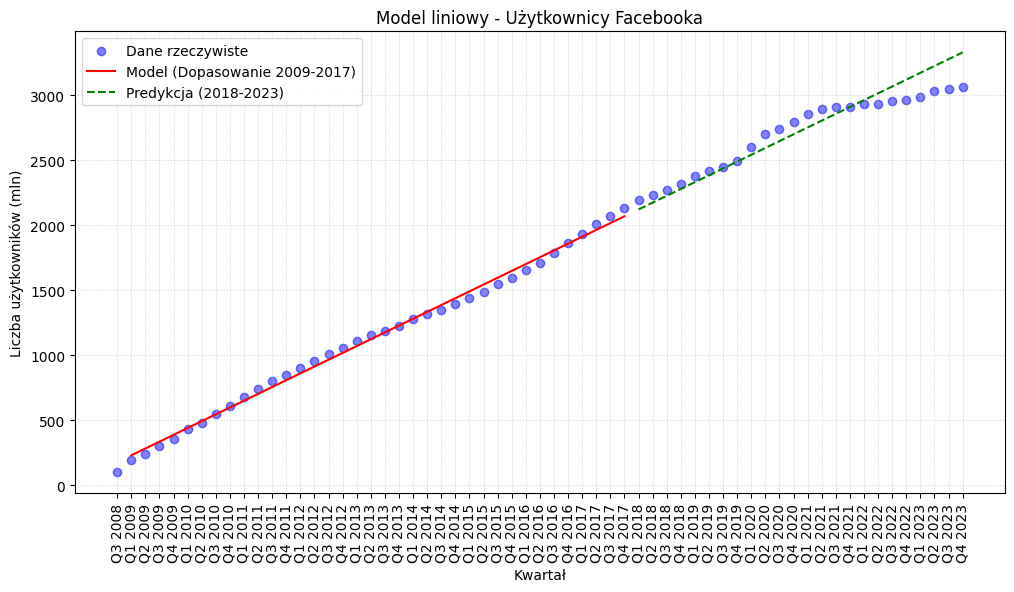

Średni błąd (MAE) dla lat 2018-2020: 55.95 mln
Średni błąd (MAE) dla lat 2021-2023: 124.17 mln


In [2]:
data, data_train, data_test = dane.dane_uzytkownicy()

# Definicja modelu
X_train = data_train['NoQ']
X_train = sm.add_constant(X_train)
Y_train = data_train['Users']

model_liniowy = sm.OLS(Y_train, X_train).fit()


# Ocena modelu
print("PODSUMOWANIE MODELU LINIOWEGO (dla danych 2009-2017)\n")
print(model_liniowy.summary())

X_pred = data_test['NoQ']
X_pred = sm.add_constant(X_pred)
Y_pred = model_liniowy.predict(X_pred)

plt.figure(figsize=(12, 6))
plt.scatter(data['NoQ'], data['Users'], color='blue', label='Dane rzeczywiste', alpha=0.5)
plt.plot(data_train['NoQ'], model_liniowy.fittedvalues, color='red', label='Model (Dopasowanie 2009-2017)')
plt.plot(data_test['NoQ'], Y_pred, color='green', linestyle='--', label='Predykcja (2018-2023)')

plt.title('Model liniowy - Użytkownicy Facebooka')
plt.xlabel('Kwartał')
plt.ylabel('Liczba użytkowników (mln)')
plt.xticks(range(min(data['NoQ']), max(data['NoQ'])+1), labels=data['QY'], rotation=90)
plt.grid(which='major', linestyle=':', linewidth='0.4')
plt.legend()
plt.grid(True)
plt.show()

model_liniowy_mae_2018_2020 = mean_absolute_error(
    data_test[data_test['QY'] <= dane.Quarter(4, 2020)]['Users'],
    Y_pred[data_test['QY'] <= dane.Quarter(4, 2020)]
)

model_liniowy_mae_2021_2023 = mean_absolute_error(
    data_test[data_test['QY'] >= dane.Quarter(1, 2021)]['Users'],
    Y_pred[data_test['QY'] >= dane.Quarter(1, 2021)]
)

print(f"Średni błąd (MAE) dla lat 2018-2020: {model_liniowy_mae_2018_2020:.2f} mln")
print(f"Średni błąd (MAE) dla lat 2021-2023: {model_liniowy_mae_2021_2023:.2f} mln")



## Model wykładniczy

Funkcja wykładnicza opisująca zjawisko \
$ W = b \cdot a^X $ \
, gdzie: \
$W$ -> 'Users' \
$X$ -> 'NoQ'

Linearyzacja funkcji:

$ Y = log(W) $ \
$ a_0 = log(b)$ \
$ a_1 = log(a)$

$ Y = a_1 \cdot X + a_0 $

PODSUMOWANIE MODELU WYKŁADNICZNEGO (dla danych 2009-2017)

                            OLS Regression Results                            
Dep. Variable:                  Users   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     292.5
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           2.85e-18
Time:                        14:03:25   Log-Likelihood:                 7.0235
No. Observations:                  36   AIC:                            -10.05
Df Residuals:                      34   BIC:                            -6.880
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

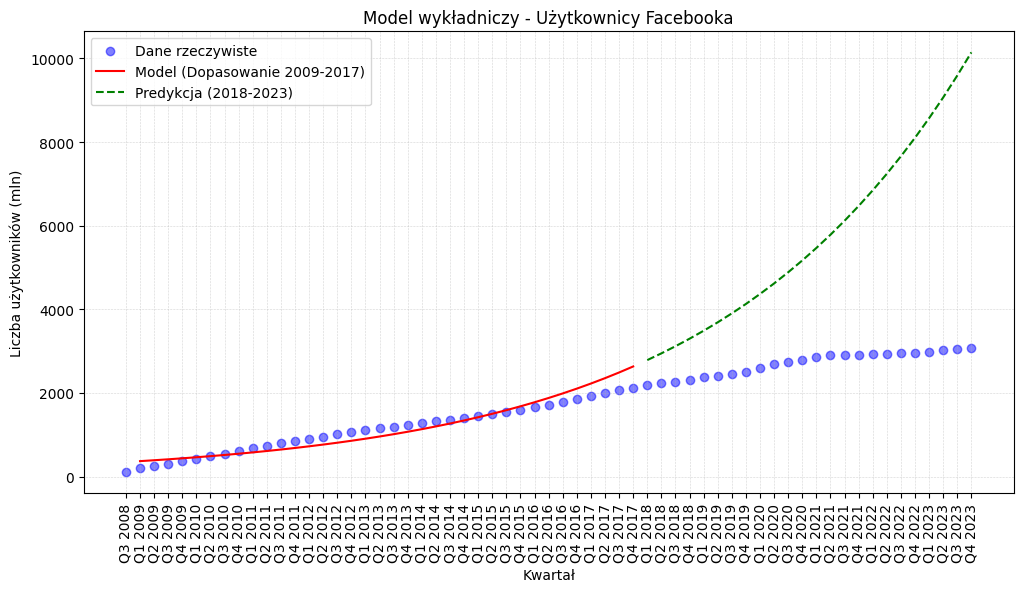

Średni błąd (MAE) dla lat 2018-2020: 1399.23 mln
Średni błąd (MAE) dla lat 2021-2023: 4630.94 mln


In [3]:
data, data_train, data_test = dane.dane_uzytkownicy()

# Definicja modelu
X_train = data_train['NoQ']
X_train = sm.add_constant(X_train)
Y_train = data_train['Users']

model_wykladniczy = sm.OLS(
    np.log(Y_train),
    X_train
).fit()

# Ocena modelu
print("PODSUMOWANIE MODELU WYKŁADNICZNEGO (dla danych 2009-2017)\n")
print(model_wykladniczy.summary())

X_pred = data_test['NoQ']
X_pred = sm.add_constant(X_pred)
Y_pred_wykl = model_wykladniczy.predict(X_pred)

plt.figure(figsize=(12, 6))
plt.scatter(data['NoQ'], data['Users'], color='blue', label='Dane rzeczywiste', alpha=0.5)
plt.plot(data_train['NoQ'], np.exp(model_wykladniczy.fittedvalues), color='red', label='Model (Dopasowanie 2009-2017)')
plt.plot(data_test['NoQ'], np.exp(Y_pred_wykl), color='green', linestyle='--', label='Predykcja (2018-2023)')

plt.title('Model wykładniczy - Użytkownicy Facebooka')
plt.xlabel('Kwartał')
plt.ylabel('Liczba użytkowników (mln)')
plt.xticks(range(min(data['NoQ']), max(data['NoQ'])+1), labels=data['QY'], rotation=90)
plt.grid(which='major', linestyle=':', linewidth='0.4')
plt.legend()
plt.grid(True)
plt.show()

model_wykladniczy_mae_2018_2020 = mean_absolute_error(
    data_test[data_test['QY'] <= dane.Quarter(4, 2020)]['Users'],
    np.exp(Y_pred_wykl[data_test['QY'] <= dane.Quarter(4, 2020)])
)

model_wykladniczy_mae_2021_2023 = mean_absolute_error(
    data_test[data_test['QY'] >= dane.Quarter(1, 2021)]['Users'],
    np.exp(Y_pred_wykl[data_test['QY'] >= dane.Quarter(1, 2021)])
)

print(f"Średni błąd (MAE) dla lat 2018-2020: {model_wykladniczy_mae_2018_2020:.2f} mln")
print(f"Średni błąd (MAE) dla lat 2021-2023: {model_wykladniczy_mae_2021_2023:.2f} mln")



## Model potęgowy

Funkcja potęgowa opisująca zjawisko \
$ W = b \cdot X^a $ \
, gdzie: \
$W$ -> 'Users' \
$X$ -> 'NoQ'

Linearyzacja funkcji:

$ Y = log(W) $ \
$ X_1 = log(X) $ \
$ a_0 = log(b)$ \
$ a_1 = log(a)$

$ Y = a_1 \cdot X_1 + a_0 $


PODSUMOWANIE MODELU POTĘGOWEGO (dla danych 2009-2017)

                            OLS Regression Results                            
Dep. Variable:                  Users   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.200e+04
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           6.29e-45
Time:                        14:03:25   Log-Likelihood:                 71.957
No. Observations:                  36   AIC:                            -139.9
Df Residuals:                      34   BIC:                            -136.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

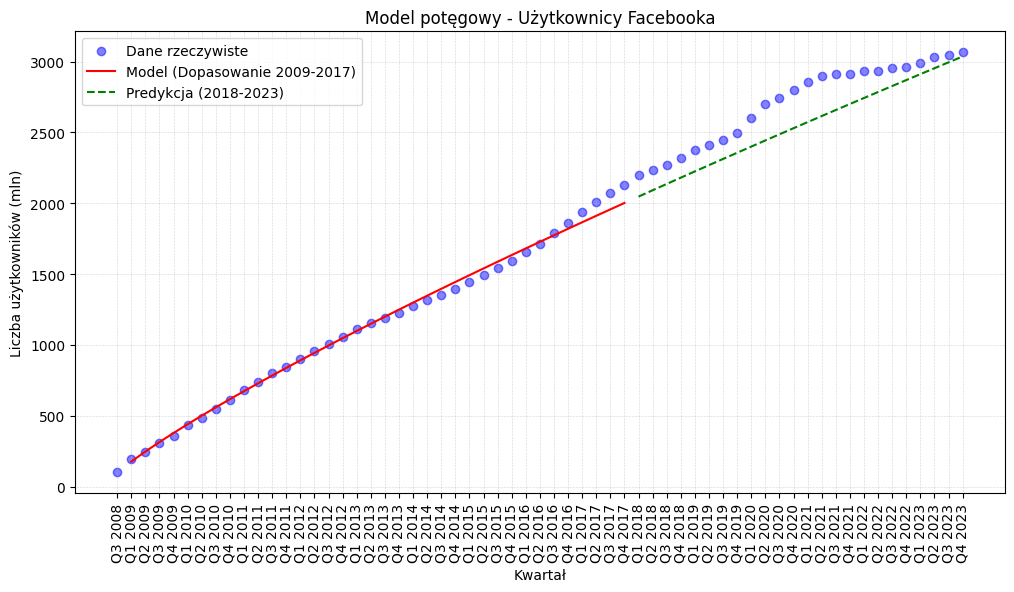

Średni błąd (MAE) dla lat 2018-2020: 176.87 mln
Średni błąd (MAE) dla lat 2021-2023: 152.46 mln


In [4]:
data, data_train, data_test = dane.dane_uzytkownicy()

# Definicja modelu
X_train = np.log(data_train['NoQ'])
X_train = sm.add_constant(X_train)
Y_train = data_train['Users']

model_potegowy = sm.OLS(
    np.log(Y_train),
    X_train
).fit()

# Ocena modelu
print("PODSUMOWANIE MODELU POTĘGOWEGO (dla danych 2009-2017)\n")
print(model_potegowy.summary())

X_pred = np.log(data_test['NoQ'])
X_pred = sm.add_constant(X_pred)
Y_pred_pot = model_potegowy.predict(
    X_pred
)

plt.figure(figsize=(12, 6))
plt.scatter(data['NoQ'], data['Users'], color='blue', label='Dane rzeczywiste', alpha=0.5)
plt.plot(data_train['NoQ'], np.exp(model_potegowy.fittedvalues), color='red', label='Model (Dopasowanie 2009-2017)')
plt.plot(data_test['NoQ'], np.exp(Y_pred_pot), color='green', linestyle='--', label='Predykcja (2018-2023)')

plt.title('Model potęgowy - Użytkownicy Facebooka')
plt.xlabel('Kwartał')
plt.ylabel('Liczba użytkowników (mln)')
plt.xticks(range(min(data['NoQ']), max(data['NoQ'])+1), labels=data['QY'], rotation=90)
plt.grid(which='major', linestyle=':', linewidth='0.4')
plt.legend()
plt.grid(True)
plt.show()

model_potegowy_mae_2018_2020 = mean_absolute_error(
    data_test[data_test['QY'] <= dane.Quarter(4, 2020)]['Users'],
    np.exp(Y_pred_pot[data_test['QY'] <= dane.Quarter(4, 2020)])
)

model_potegowy_mae_2021_2023 = mean_absolute_error(
    data_test[data_test['QY'] >= dane.Quarter(1, 2021)]['Users'],
    np.exp(Y_pred_pot[data_test['QY'] >= dane.Quarter(1, 2021)])
)

print(f"Średni błąd (MAE) dla lat 2018-2020: {model_potegowy_mae_2018_2020:.2f} mln")
print(f"Średni błąd (MAE) dla lat 2021-2023: {model_potegowy_mae_2021_2023:.2f} mln")



## Model hybrydowy

Na podstawie wyników modelu wykładniczego i potęgowego, zauważono zależność:
- model wykładniczy 'przeszacowuje' liczbe użytkowników w latach 2018-2023
- model potęgowy 'nie doszacowuje' liczbe użytkowników w latach 2018-2023

Model dobrze opisujący liczbe użytkowników w latach 2018-2023 znajduje się zatem pomiędzy testowanymi modelami, a opisuje go średnia ważona obu modeli: \
$Y_{hybryda} = \alpha \cdot Y_{potęgowy} + (1 - \alpha) \cdot Y_{wykładniczy}$

Zadaniem stało się znalezienie najlepszej wartości $\alpha$. Parametr można wyznaczyć poprzez rozwiązanie zadania optymalizacyjnego, którego celem jest minimalizacja funkcji MAE. Funkcją MAE może być MAE wyników predykcji dla lat 2018-2020 lub 2021-2023, albo wyniki predykcji dla lat 2018-2023.

Po eksperymentach wybrano funkcję MAE wyników predykcji dla lat 2018-2023, ponieważ zwraca najlepsze wyniki.

Wyznaczona wartość alfa: 0.07
Wynik R^2 dla modelu hybrydowego: 0.996


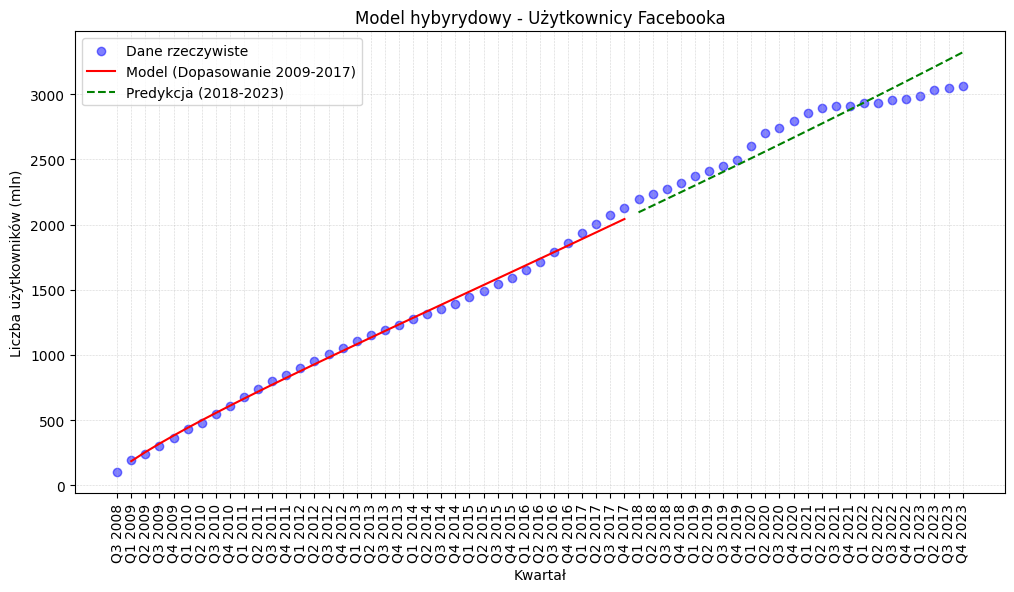

Średni błąd (MAE) dla lat 2018-2020: 87.19 mln
Średni błąd (MAE) dla lat 2021-2023: 121.91 mln


In [5]:

from scipy.optimize import minimize_scalar
from sklearn.metrics import r2_score

y_wykl = model_wykladniczy.fittedvalues
y_pot = model_potegowy.fittedvalues

def function(alfa):
    y = alfa * y_wykl + (1 - alfa) * y_pot
    pred = alfa * Y_pred_wykl + (1 - alfa) * Y_pred_pot

    mae_train = mean_absolute_error(
        data_train['Users'],
        y
    )

    mae_2018_2020 = mean_absolute_error(
        data_test[data_test['QY'] <= dane.Quarter(4, 2020)]['Users'],
        np.exp(pred[data_test['QY'] <= dane.Quarter(4, 2020)])
    )

    mae_2021_2023 = mean_absolute_error(
        data_test[data_test['QY'] >= dane.Quarter(1, 2021)]['Users'],
        np.exp(pred[data_test['QY'] >= dane.Quarter(1, 2021)])
    )

    mae_2018_2023 = mean_absolute_error(
        data_test['Users'],
        np.exp(pred)
    )

    # zwracana wartość decyduje co wpływa na wartość alfa
    return mae_2018_2023

alfa = minimize_scalar(function, bounds=(0, 1)).x
print(f"Wyznaczona wartość alfa: {alfa:.2f}")
y_hybr = alfa * y_wykl + (1 - alfa) * y_pot
Y_pred_hyb = alfa * Y_pred_wykl + (1 - alfa) * Y_pred_pot

r2_hyb = r2_score(data_train['Users'], np.exp(y_hybr))
print(f"Wynik R^2 dla modelu hybrydowego: {r2_hyb:.3f}")

plt.figure(figsize=(12, 6))
plt.scatter(data['NoQ'], data['Users'], color='blue', label='Dane rzeczywiste', alpha=0.5)
plt.plot(data_train['NoQ'], np.exp(y_hybr), color='red', label='Model (Dopasowanie 2009-2017)')
plt.plot(data_test['NoQ'], np.exp(Y_pred_hyb), color='green', linestyle='--', label='Predykcja (2018-2023)')

plt.title('Model hybyrydowy - Użytkownicy Facebooka')
plt.xlabel('Kwartał')
plt.ylabel('Liczba użytkowników (mln)')
plt.xticks(range(min(data['NoQ']), max(data['NoQ'])+1), labels=data['QY'], rotation=90)
plt.grid(which='major', linestyle=':', linewidth='0.4')
plt.legend()
plt.grid(True)
plt.show()

model_hybrydowy_mae_2018_2020 = mean_absolute_error(
    data_test[data_test['QY'] <= dane.Quarter(4, 2020)]['Users'],
    np.exp(Y_pred_hyb[data_test['QY'] <= dane.Quarter(4, 2020)])
)

model_hybrydowy_mae_2021_2023 = mean_absolute_error(
    data_test[data_test['QY'] >= dane.Quarter(1, 2021)]['Users'],
    np.exp(Y_pred_hyb[data_test['QY'] >= dane.Quarter(1, 2021)])
)

print(f"Średni błąd (MAE) dla lat 2018-2020: {model_hybrydowy_mae_2018_2020:.2f} mln")
print(f"Średni błąd (MAE) dla lat 2021-2023: {model_hybrydowy_mae_2021_2023:.2f} mln")
